In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [26]:
# definitonen
def count_nans(data):
    print(np.isnan(data).astype(int).sum())

In [27]:
## old stuff

# daten laden
df1 = pd.read_csv("020120.csv", encoding="ISO-8859-1", usecols = ["Datum / Uhrzeit", "Wert"], infer_datetime_format =True)

data1 = np.array(df1["Wert"])
data_mask1 = np.ma.array(data1, mask=np.isnan(data1))
data_mask2 = np.delete(data_mask1, [i for i in range (8735, 8783)], axis=0)
data_tmp_daily = data_mask2.reshape(-1, 168)
data_week_only = np.delete(data_tmp_daily,[i for i in range (119, 167)], axis=1)
data_weekly = data_week_only.reshape(6240,)
data_weekly_final = data_weekly.reshape(-1, 24).T

#Daten am Wochenende

data_weekend_only =np.delete(data_tmp_daily,[i for i in range (0,120)], axis=1)

data_weekend = data_weekend_only.reshape(2496, )


# Let's go

#### Define some helper functions

In [173]:
def prepare_data(data, return_rng=True):
    data = data.reshape(-1, 24).T
    smooth = np.mean(data, axis=1)
    error = np.std(data, axis=1)
    if return_rng:
        return smooth, error, pd.date_range('01-01-2020 01:00:00', periods=24, freq='H')
    return smooth, error


def plot_data_and_error(data_x, data_y, error, num_std=1., color="darkblue", define_figure=True, scale_factor=None, label="$NO_2$"):
    if define_figure:
        plt.figure(figsize=(18,10))
    if scale_factor is not None:
        error = error * scale_factor
    plt.plot(data_x, data_y, color=color, lw=2., label=label)
    plt.plot(data_x, data_y+num_std*error, color=color, lw=0.5)
    plt.plot(data_x, data_y-num_std*error, color=color, lw=0.5)
    plt.fill_between(data_x, data_y+num_std*error, data_y-num_std*error, color=color, alpha=0.1)
    plt.grid()
    plt.xticks(data_x[np.arange(len(data_x))%6==0], ["01:00", "07:00", "13:00", "19:00"])
    plt.ylabel("$NO_2$")
    plt.xlabel("Datum/Uhrzeit")
    plt.legend()
    

#### Get the data

In [188]:
df1 = pd.read_csv("020120.csv", encoding="ISO-8859-1", usecols = ["Datum / Uhrzeit", "Wert"], infer_datetime_format =True)
data1 = np.array(df1["Wert"])
data_mask1 = np.ma.array(data1, mask=np.isnan(data1))

In [189]:
data_smooth1, data_error1, rng1 = prepare_data(data_mask1)

### Plot daily mean (full year)

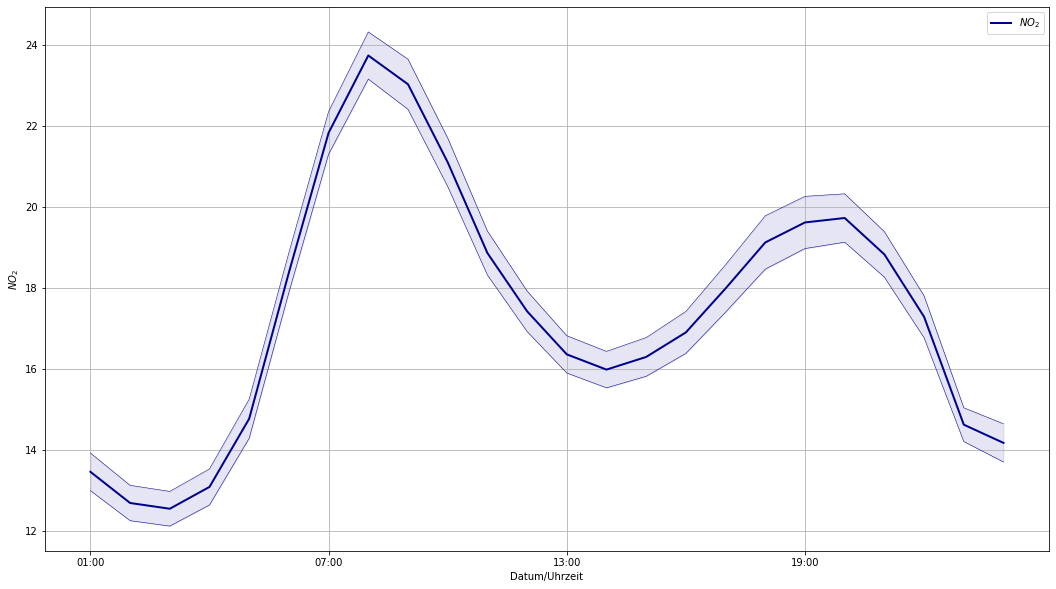

In [230]:
plot_data_and_error(rng1, data_smooth1, data_error1, scale_factor=1/np.sqrt(366), num_std=1.)
plt.savefig("NO2_daily.png")

#### prepare for season-wise plotting

In [194]:
num_data = data_mask1.shape[0]
print(f"num_data: {num_data}")
# shift data to allow for easy season-wise indexing
#data_mask1 = np.roll(data_mask1, num_data//12)   # check data carefully
#seasons
data_winter = data_mask1[:num_data//4+12]
data_spring = data_mask1[num_data//4+12:2*num_data//4]
data_summer = data_mask1[2*num_data//4:3*num_data//4+12]
data_autumn = data_mask1[3*num_data//4+12:4*num_data//4]

num_data: 8784


In [192]:
data_smooth_winter, data_error_winter, rng_winter = prepare_data(data_winter)
data_smooth_spring, data_error_spring, rng_spring = prepare_data(data_spring)
data_smooth_summer, data_error_summer, rng_summer = prepare_data(data_summer)
data_smooth_autumn, data_error_autumn, rng_autumn = prepare_data(data_autumn)

## Daily NO2 for each season

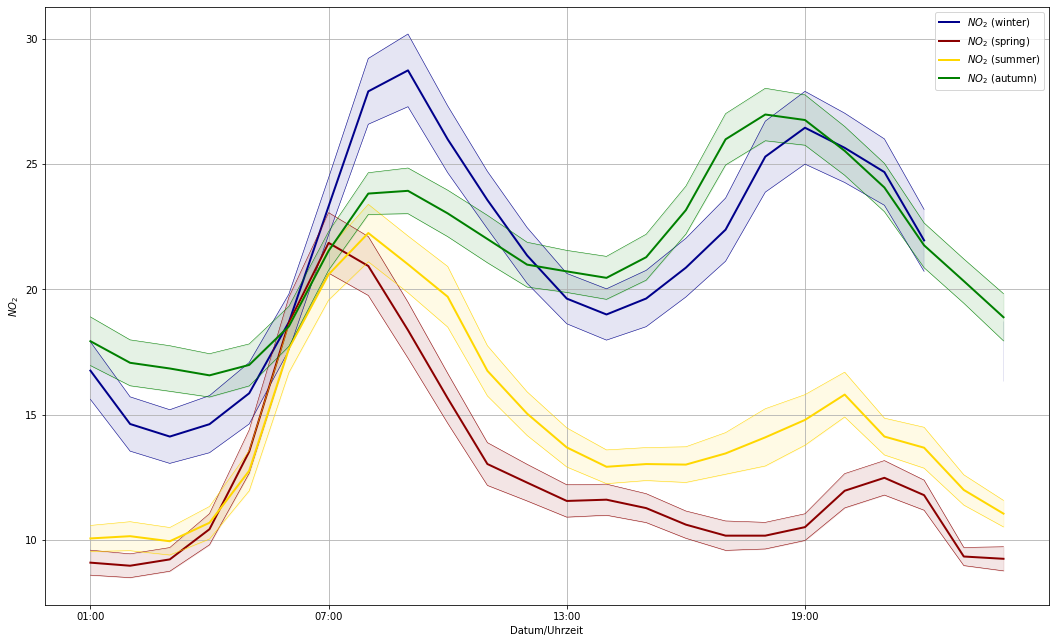

In [231]:
scale_factor = 1./np.sqrt(366/4)

plt.figure(figsize=(18,11))
# winter
plot_data_and_error(rng_winter, data_smooth_winter, data_error_winter, define_figure=False, scale_factor=scale_factor, 
                    label="$NO_2$ (winter)")
# spring
plot_data_and_error(rng_spring, data_smooth_spring, data_error_spring, define_figure=False, color="darkred", scale_factor=scale_factor, 
                    label="$NO_2$ (spring)")
# summer 
plot_data_and_error(rng_summer, data_smooth_summer, data_error_summer, define_figure=False, color="gold", scale_factor=scale_factor, 
                   label="$NO_2$ (summer)")
# autumn
plot_data_and_error(rng_autumn, data_smooth_autumn, data_error_autumn, define_figure=False, color="green", scale_factor=scale_factor, 
                   label="$NO_2$ (autumn)")
plt.grid()
plt.savefig("NO2_season.png")

### weeks vs. weekends (todo)

In [221]:
data = data_mask1.reshape(-1, 24).T
data = data[:, 4:-5]   # delete the first four days, since we want to start on a monday. also cut the last days such that it ends on 27-12-20 (sunday)
print(data.shape)
# prepare:
data = data.reshape(24, 7, -1)
week, weekend = data[:, :5, :], data[:, 5:, :]
week = week.reshape(week.shape[0], -1)
weekend = weekend.reshape(weekend.shape[0], -1)

(24, 357)


In [216]:
smooth_week, error_week, rng = prepare_data(week)
smooth_weekend, error_weekend, _ = prepare_data(weekend)

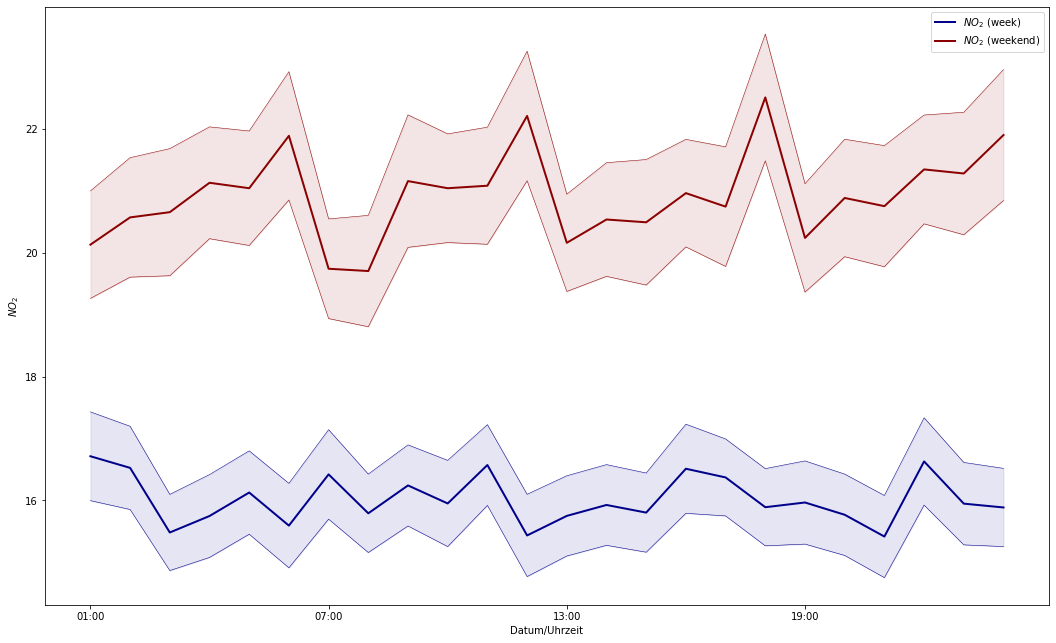

In [217]:
scale_factor_week = 1./np.sqrt(51*5)
scale_factor_weekend = 1./np.sqrt(51*2)

plt.figure(figsize=(18,11))
# week
plot_data_and_error(rng, smooth_week, error_week, define_figure=False, scale_factor=scale_factor_week, 
                    label="$NO_2$ (week)")
# weekend
plot_data_and_error(rng, smooth_weekend, error_weekend, define_figure=False, color="darkred", scale_factor=scale_factor_weekend, 
                    label="$NO_2$ (weekend)")

### Old Stuff

In [67]:
dfs = [df_täglich_winter, df_täglich_spring, df_täglich_summer, df_täglich_autumn] #df_täglich1, 

In [68]:
dfs = [df.set_index("Datum / Uhrzeit") for df in dfs]

In [69]:
df_all=dfs[0].join(dfs[1:])

In [70]:
df_all

,NO2_winter,std_winter,NO2_spring,std_spring,NO2_summer,std_summer,NO2_autumn,Std_autumn
Datum / Uhrzeit,,,,,,,,
2020-01-01 01:00:00,16.760870,10.980585,9.098901,4.764924,10.065217,4.964667,17.934066,9.280491
2020-01-01 02:00:00,14.630952,10.361076,8.976190,4.538135,10.154762,5.534511,17.072289,8.757486
2020-01-01 03:00:00,14.129412,10.241540,9.228916,4.515903,9.952381,5.248367,16.845238,8.693859
2020-01-01 04:00:00,14.623529,10.901674,10.433735,5.945927,10.690476,6.216292,16.571429,8.266809
2020-01-01 05:00:00,15.857143,11.724154,13.530120,8.267132,12.764706,7.667574,16.987952,8.008270
2020-01-01 06:00:00,18.695652,10.706296,18.670330,9.794655,17.641304,9.170583,18.527473,7.633559
2020-01-01 07:00:00,23.315217,10.887697,21.857143,11.540251,20.597826,9.765801,21.538462,7.360882
2020-01-01 08:00:00,27.902174,12.557745,20.934066,11.240432,22.250000,10.954079,23.824176,7.960884
2020-01-01 09:00:00,28.739130,13.873551,18.373626,10.679804,21.000000,10.831375,23.933333,8.716268


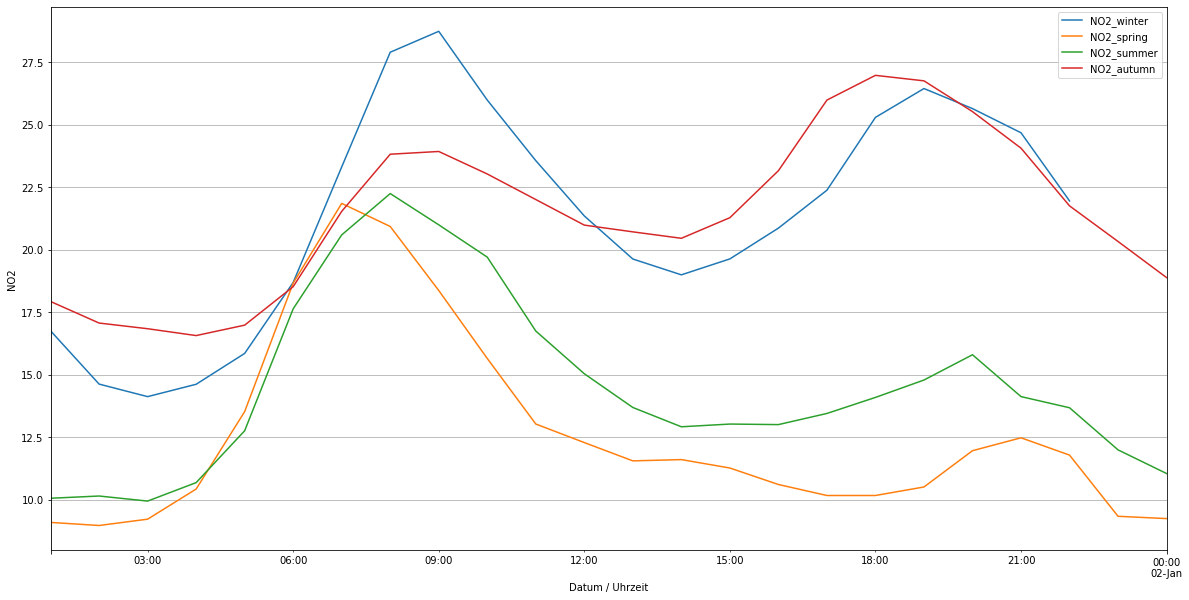

In [79]:
ax =df_all.plot(grid=True, y=["NO2_winter","NO2_spring","NO2_summer", "NO2_autumn"],figsize=(20,10), kind="line")
ax.set_ylabel("NO2")
plt.savefig("mediumdailycycleseasons.png")

In [ ]:
#monthly

In [76]:
months = list()
for i in range(12):
    len_month = num_data//12
    if i % 2 == 0:
        months.append(data_mask1[i*len_month:(i+1)*len_month+12])
    else:
        months.append(data_mask1[i*len_month+12:(i+1)*(len_month)])

In [82]:
def data_tmp(data):
    return data.reshape(-1,24).T

def data_smooth(data):
    return np.mean(data, axis=1)

def data_error(data):
    return np.std(data, axis=1)

def rng(p=24, f="H"):
    return pd.date_range('01-01-2020 01:00:00', periods=p, freq=f)

def df_taeglich(rng, mean, err, x='Datum / Uhrzeit', y="Wert", z = "Std"):
    return pd.DataFrame({ x: rng, y: mean, z : err})

def pipeline(data, label, ax, color):
    data = data_tmp(data)
    error = data_error(data)
    mean = data_smooth(data)
    time_range = rng(p=24, f="H")
    df_per_day = df_taeglich(time_range, mean, error, y=label)
    ax = df_per_day.plot(x="Datum / Uhrzeit", y=[label], figsize=(20,10), kind="line", ax=ax, grid=True, color=color)
    ax.set_ylabel("NO2")
    plt.savefig("monthsNO2.png")
    return ax

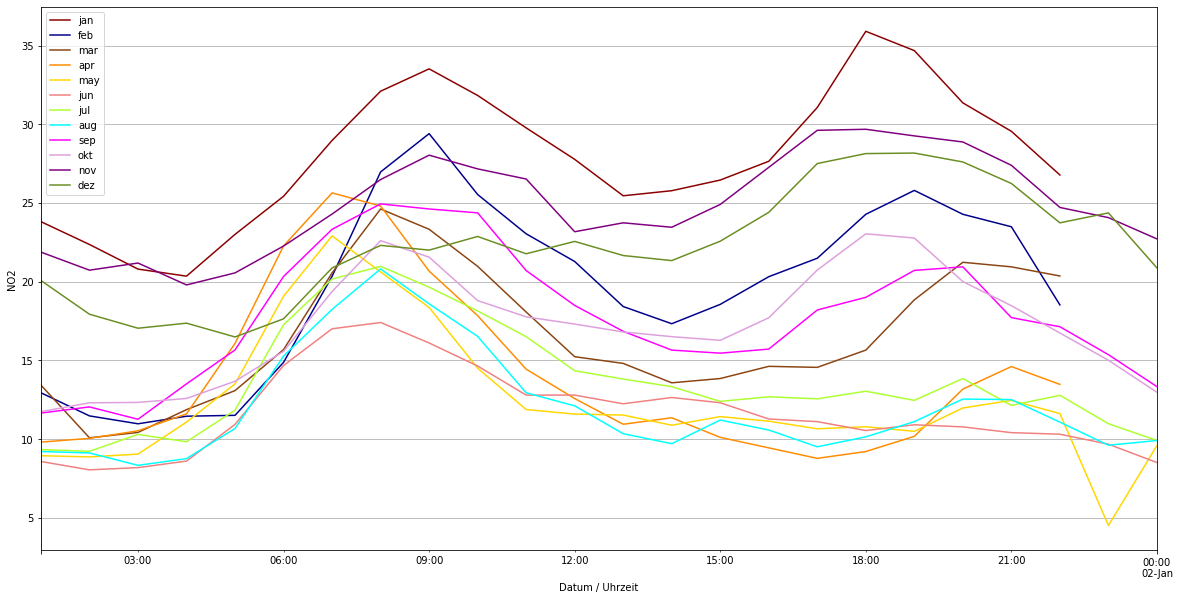

In [83]:
month_names = {0: "jan", 1: "feb", 2: "mar", 3: "apr", 4: "may", 5: "jun", 6: "jul", 7: "aug", 8: "sep", 9: "okt", 10: "nov", 11: "dez"}
cols = ["darkred", "darkblue", "saddlebrown", "darkorange", "gold", "lightcoral", "greenyellow", "cyan", "fuchsia", "plum", "purple", "olivedrab"]

#cols = np.random.uniform(0, 1, size=(len(months), 3))

ax = None
for i, month in enumerate(months):
    ax = pipeline(month, month_names[i], ax, color=cols[i])

In [ ]:

def pipeline2(data, label):
    data = data_tmp(data)
    error = data_error(data)
    mean = data_smooth(data)
    time_range = rng(p=24, f="H")
    df_per_day = df_taeglich(time_range, mean, error, y=label)
    df_per_day.plot(x="Datum / Uhrzeit", y=[label], figsize=(20,10), kind="line", grid=True)

In [ ]:
pipeline2(data_weekly, "weekly")

In [ ]:
pipeline2(data_weekend, "weekend")